# Dividir el dataset en conjunto de entrenamiento y de testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/ads/Advertising.csv")


In [4]:
a = np.random.randn(len(data))

(array([ 3.,  2., 16., 30., 47., 51., 30., 19.,  1.,  1.]),
 array([-3.24915096, -2.60327531, -1.95739966, -1.31152401, -0.66564835,
        -0.0197727 ,  0.62610295,  1.27197861,  1.91785426,  2.56372991,
         3.20960556]),
 <a list of 10 Patch objects>)

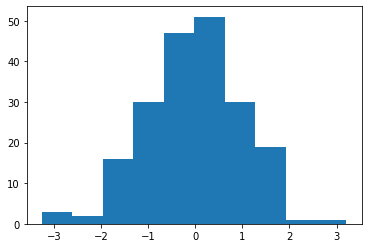

In [5]:
plt.hist(a)# Vamos a hacer una validación de nuestros modelos; para esto, vamos a dividir los 
#en un 80 porciento para entrenarlos y 20% para hacer un testing

In [6]:
check = (a<0.8) #nos auedamos con el 80%
training = data[check] #variable de entrenamiento
testing = data[~check] #variable de tsting

In [7]:
len(training), len(testing)

(160, 40)

In [8]:
import statsmodels.formula.api as smf #ahora que tenemos el conjunto de entrenamiento, vemos 
#el modelo.
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()#predicción de las ventas en 
#funcion de tele y radio

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     632.3
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           7.69e-76
Time:                        23:29:33   Log-Likelihood:                -312.47
No. Observations:                 160   AIC:                             630.9
Df Residuals:                     157   BIC:                             640.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7511      0.345      7.966      0.000       2.069       3.433
TV             0.0465      0.002     28.816      0.000       0.043       0.050
Radio          0.1874      0.009     20.657      0.000       0.170       0.205
==============================================================================
Omnibus:                       46.180   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.493
Skew:                          -1.237   Prob(JB):                     7.51e-24
Kurtosis:                       6.139   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validación del modelo con el conjunto de testing

In [10]:
sales_pred = lm.predict(testing) #como solo tenemos el 20 porciento de datos, hacemos una 
#predicción
sales_pred

6      11.573446
10      6.912918
14     18.411492
18      9.812318
20     18.102048
24      8.010670
26     14.889946
28     19.403689
29      9.034013
32      7.553636
36     23.375692
38      9.760297
51      9.220659
52     20.633014
54     20.368896
58     21.853207
66      8.827107
83     14.273388
89     16.817681
90      9.916650
95     16.269966
97     15.287978
101    23.342212
104    20.260101
119     6.652373
121     7.692806
124    19.480551
126    10.404895
127     6.481714
138     9.605702
142    19.230589
145     9.633463
150    18.413506
159    12.325992
160    14.167632
169    17.962451
178    16.053270
185    20.739984
189     5.888841
192     4.319638
dtype: float64

In [11]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD #suma de los cuadrados de las diferencias

93.22532328458048

In [12]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE #desviación estandar de los residuos

1.587325843050408

In [13]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error #arrojandonos un error de 11 por ciento

0.11194117369890041

ValueError: x and y must have same first dimension, but have shapes (200, 1) and (40,)

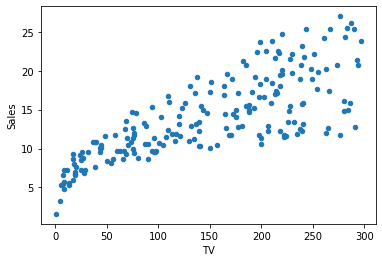

In [14]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [15]:
from IPython.display import Image
Image(filename="resources/summary-lm.png")

FileNotFoundError: [Errno 2] No such file or directory: 'resources/summary-lm.png'